# Iris Flower Classification

## Importing Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [21]:
iris_data = pd.read_csv('iris.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Explore the dataset
print("\nDataset information:")
print(iris_data.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [23]:
iris_data['species'],categories =pd.factorize(iris_data['species'])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
print("\nMissing values:")
print(iris_data.isnull().sum())


Missing values:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [25]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

C:\Users\shaje\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Pairplot of Iris Dataset by Species')

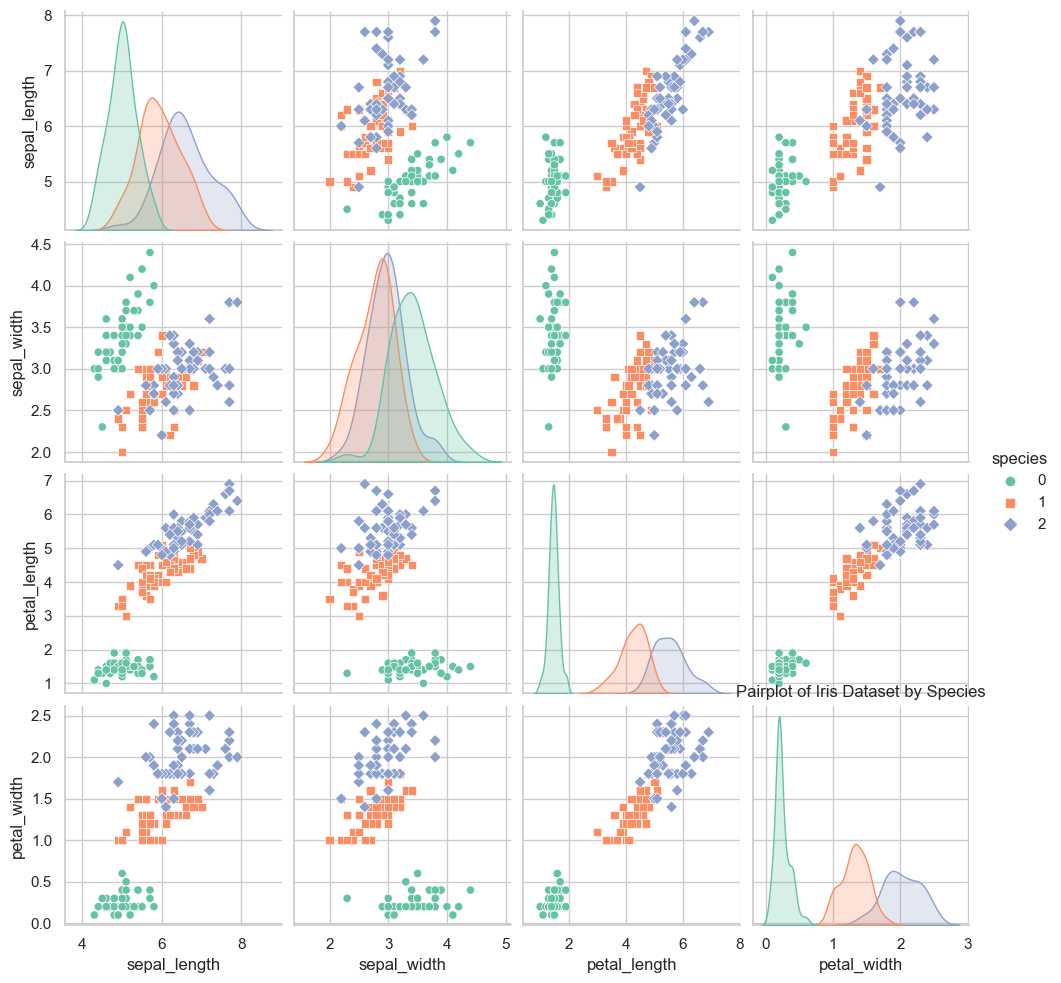

In [26]:
# Pairplot to visualize relationships between features
sns.pairplot(data=iris_data, hue='species', markers=['o', 's', 'D'], palette='Set2')
plt.title("Pairplot of Iris Dataset by Species")

In [27]:
# Split the data into features (X) and target (y)
X = iris_data.drop(columns='species')
y = iris_data['species']

In [28]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Create and train a Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

In [30]:
# Train the model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
# Predict on the training set
train_predictions = model.predict(X_train)

In [32]:
# Predict on the test set
test_predictions = model.predict(X_test)

In [33]:
# Evaluate the model
print("\nModel Evaluation:")
print(f"Training Accuracy: {accuracy_score(y_train, train_predictions):.2f}")
print(f"Test Accuracy: {accuracy_score(y_test, test_predictions):.2f}")


Model Evaluation:
Training Accuracy: 0.97
Test Accuracy: 1.00


In [34]:
# Display a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, test_predictions))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [35]:
print("\nConfusion Matrix:")
confusion = confusion_matrix(y_test, test_predictions)
print(pd.DataFrame(confusion, columns=iris_data['species'].unique(), index=iris_data['species'].unique()))


Confusion Matrix:
    0  1   2
0  10  0   0
1   0  9   0
2   0  0  11
